In [1]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.25)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [ ]:
import os.path

for outer_subset in ['fruitfly']:
    for species_subset_list, f_name in zip( [ mya_ben[mya_ben['class'] == 'Mammalia']['saved_name'].tolist(), mya_ben[mya_ben['phylum'] == 'Chordata']['saved_name'].tolist(), mya_ben[mya_ben['kingdom'] == 'Metazoa']['saved_name'].tolist(), mya_ben[mya_ben['class'] == 'Insecta']['saved_name'].tolist(), mya_ben[(mya_ben['phylum'] == 'Chordata') | (mya_ben['phylum'] == 'Arthropoda') ]['saved_name'].tolist()], ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']):
        empty_list = []
        counter = 0
        for  species_subset in species_subset_list:
            
            
            if species_subet != outer_subset:
            
                if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                    counter = counter + 1
            
                    try:

                        ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]

                        empty_list.append(df)
                    except:


                        ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                        df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                        df = df.drop_duplicates(subset=[species_subset], keep=False)
                        df = df.drop_duplicates(subset=[outer_subset], keep=False)
                        exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5')
                        df = df[df[species_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                        empty_list.append(df)

        df = pd.concat(empty_list)
        df['count'] = 1

        df_gene_freq = df.groupby([outer_subset])['count'].sum().reset_index()
        df_gene_freq[df_gene_freq['count']>=counter].to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)


In [ ]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    exp_file = hm.hiCMatrix(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{outer_subset}_prioAggNet_minimal.h5')
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')
                    df_subset_genes = df_subset_genes[df_subset_genes[outer_subset].isin([x[3].decode() for x in exp_file.cut_intervals])]
                    df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp', index=False)
                    
                    

In [ ]:

for outer_subset in ['human', 'mouse', 'fruitfly']:
    for f_name in ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']:
        empty_list = []
        for  species_subset in mya_ben['saved_name'].tolist():
            if os.path.exists(f'/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/{species_subset}_prioAggNet_minimal.h5'):
                if os.path.exists(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp'):
            
                    df_subset_genes = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp')

                    if species_subset != outer_subset:


                        try:

                            ortho_file=f"{outer_subset}_{species_subset}_orthoNM.csv"

                            df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                            df = df.drop_duplicates(subset=[species_subset], keep=False)
                            df = df.drop_duplicates(subset=[outer_subset], keep=False)
                            df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                            df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            
                        except:

                            try:
                                ortho_file=f"{species_subset}_{outer_subset}_orthoNM.csv"
                                df = pd.read_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}')
                                df = df.drop_duplicates(subset=[species_subset], keep=False)
                                df = df.drop_duplicates(subset=[outer_subset], keep=False)
                                df = df[df[outer_subset].isin(df_subset_genes[outer_subset].tolist())]
                                df.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{ortho_file}', index=False)
                            except:
                                pass

                    else:
                        #pass
                        df_subset_genes.to_csv(f'/grid/gillis/data//lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{outer_subset}_{f_name}_subset_coexp_{outer_subset}_{species_subset}_orthoNM.csv', index=False)




In [705]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
auc_gene_hic_exp_subset = []

for species, species_2 in zip(['human', 'human'], ['mouse', 'drosophila']):
    
            ortho_file=f"{species}_{species_2}_orthoNM.csv"
            ortho_genes = f"/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/{ortho_file}"
    
            df_1_1 = pd.read_csv(ortho_genes)

        
            df_1_1 = df_1_1.drop_duplicates(subset=[species], keep=False)
            df_1_1 = df_1_1.drop_duplicates(subset=[species_2], keep=False)
            
            
            
    
            if species == 'drosophila':
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = f'hic_gene_none_inter_10_percent_per_chr_{species_2}_aggregates_10kbp_raw.csv'
            
            else:
                fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species}/aggregates/10kbp_raw/max/inter_only/'
                fname = 'hic_gene_none_inter_1_percent_per_chr.csv'
                
                
            df_hic_auc = pd.read_csv(f'{fpath}/{fname}', sep='\t')
            
            df_hic_auc = df_1_1.merge(df_hic_auc , left_on=species, right_on='gene_id_jac_sim')
            
            if species_2 == 'drosophila':
                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/1kbp_raw/max/inter_only/'
                    fname = 'hic_gene_none_inter_1_percent_per_chr.csv'
            
            else:

                    fpath = f'/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/'
                    fname = 'hic_gene_none_inter_1_percent_per_chr.csv'


            df_hic_auc_2 = pd.read_csv(f'{fpath}/{fname}', sep='\t')

            
            dj = df_hic_auc.merge(df_hic_auc_2 , left_on=species_2, right_on='gene_id_jac_sim')
            dj['auc'] = dj['auc_x'] + dj['auc_y']
            dj['auc'] = dj['auc'] / 2.0
            
            auc_gene_hic_exp_subset.append(dj)


<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

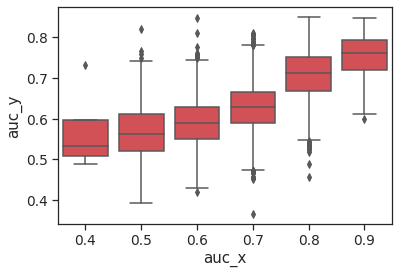

In [708]:
auc_gene_hic_exp_subset[0]['auc_x'] = auc_gene_hic_exp_subset[0]['auc_x'].round(1)
auc_gene_hic_exp_subset[0]['s2'] = 'mouse'
sns.boxplot(data=auc_gene_hic_exp_subset[0], x='auc_x', y='auc_y', palette=['#E83B43'])

<AxesSubplot:xlabel='auc_x', ylabel='auc_y'>

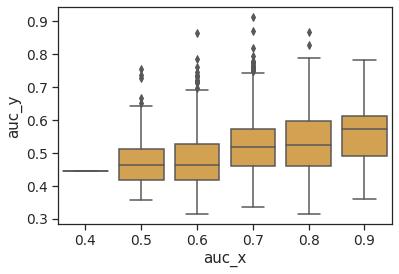

In [709]:
auc_gene_hic_exp_subset[1]['auc_x'] = auc_gene_hic_exp_subset[1]['auc_x'].round(1)
auc_gene_hic_exp_subset[1]['s2'] = 'dro'
sns.boxplot(data=auc_gene_hic_exp_subset[1], x='auc_x', y='auc_y', palette=['#E8A63B'])

In [710]:
dfc = pd.concat([auc_gene_hic_exp_subset[0], auc_gene_hic_exp_subset[1]])

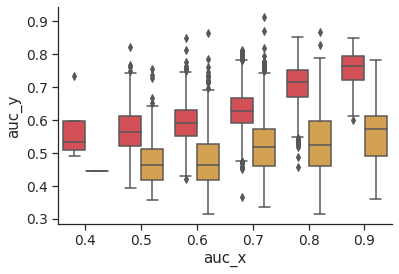

In [711]:
rcParams['figure.figsize'] = 6,4
import seaborn as sns
import colorcet as cc



palette = sns.color_palette(cc.glasbey, n_colors=18)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.boxplot(data=dfc, x='auc_x', y='auc_y', palette=['#E83B43', '#E8A63B'], hue='s2')
sc_bar.legend().remove()
sns.despine()

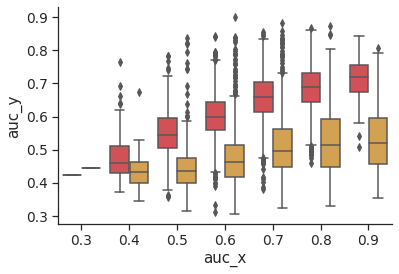

In [704]:
rcParams['figure.figsize'] = 6,4
import seaborn as sns
import colorcet as cc



palette = sns.color_palette(cc.glasbey, n_colors=18)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.boxplot(data=dfc, x='auc_x', y='auc_y', palette=['#E83B43', '#E8A63B'], hue='s2')
sc_bar.legend().remove()
sns.despine()

In [5]:
import pandas as pd
df_list = []
df_exp_rank = pd.read_csv('/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/orthologMaps/human_mouse_orthoNM.csv')
df_exp_rank = df_exp_rank.drop_duplicates(subset=['human'], keep=False)
df_exp_rank = df_exp_rank.drop_duplicates(subset=['mouse'], keep=False)
file_path_1 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_mouse/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv"

auc_values_1 = pd.read_csv(file_path_1, sep='\t')
#auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]
df1 = df_exp_rank.merge(auc_values_1, left_on='mouse', right_on='gene_id_exp_file')
file_path_2 = "/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates/10kbp_raw/max/jac_sim/90/all_bins/KR_ranked_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv"
auc_values_1 = pd.read_csv(file_path_2, sep='\t')
#auc_values_1 = auc_values_1[auc_values_1['auc'] > np.percentile(auc_values_1['auc'], 90)]
df2 = df1.merge(auc_values_1, left_on='human', right_on='gene_id_exp_file')
df2['species'] = 'Mouse'
df2['auc'] = (df2['auc_x']*10).astype(int)
df2['auc'] = (df2['auc'].astype(float))
df2['auc'] = (df2['auc'] / 10)
df_list.append(df2)

In [8]:
df = pd.concat(df_list)

In [153]:
auc_list = []
#for species_2, col_num in zip(['human', 'mouse', 'drosophila'], [5, 7, 4]):
for species_2, col_num in zip(['human'], [5]):
    ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']
    mya = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/spe39_divergence_timetree.csv")
    mya_ben = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/species_classification_ranks_processed.txt")
    

    mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T

    mya_l = mya_2[:,col_num].tolist()

    species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

    mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

    mya['species'] = [x if x!= "fly" else "drosophila" for x in mya['species']]

    import numpy as np

    for species, mya_dist in zip(mya['species'].tolist(), mya['mya'].tolist()):
        try:
            if species_2 == 'drosophila':
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp_{species_2}_chordata"
            else:
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp_{species_2}_chordata"
                
            #print (file_path_1)
            #if species_2 == 'drosophila':
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp.csv"
            #else:
            #    file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr_{species}_aggregates_with_coexp.csv"

            auc_values_1 = pd.read_csv(file_path_1, sep='\t')
            #print (auc_values_1)
            #gene_l = ortho_file['human'].tolist()
            #auc_values_1 = auc_values_1[auc_values_1['gene_id_jac_sim'].isin(gene_l)]
            #print (auc_values_1)
            auc_values_1['mya'] = mya_dist
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])


        except:
            auc_values_1['mya'] = np.nan
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            print (species)
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])
            

arabidopsis
drosophila
maize
rice
soybean
brome
grape
medicago
potato
sorghum
tomato
mustard
chlam
afrog
apple
tobacco


In [154]:
df_species_auc = pd.concat(auc_list)

df_species_auc.dropna(inplace=True)

df_species_auc = df_species_auc.merge(mya_ben, left_on='species_1', right_on='saved_name')

df_species_auc['count'] = 1

In [601]:
df_species_auc

auc    mya     species_1 species_2  gene_id_jac_sim  \
0      0.690451   96.0          boar     human  ENSG00000069667   
1      0.512804   96.0          boar     human  ENSG00000106733   
2      0.622403   96.0          boar     human  ENSG00000056586   
3      0.670572   96.0          boar     human  ENSG00000187239   
4      0.590210   96.0          boar     human  ENSG00000168803   
...         ...    ...           ...       ...              ...   
58441  0.587731  435.0  rainbowtrout     human  ENSG00000100364   
58442  0.643156  435.0  rainbowtrout     human  ENSG00000099949   
58443  0.673285  435.0  rainbowtrout     human  ENSG00000093000   
58444  0.557994  435.0  rainbowtrout     human  ENSG00000184708   
58445  0.492228  435.0  rainbowtrout     human  ENSG00000143702   

                   Species    Common_name  Tax_ID superkingdom  kingdom  \
0               Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1               Sus scrofa           Boar    9823    Eukaryota  Metazoa   
2               Sus scrofa           Boar    9823    Eukaryota  Metazoa   
3               Sus scrofa           Boar    9823    Eukaryota  Metazoa   
4               Sus scrofa           Boar    9823    Eukaryota  Metazoa   
...                    ...            ...     ...          ...      ...   
58441  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
58442  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
58443  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
58444  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
58445  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

         phylum        class          order      family         genus species  \
0      Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
1      Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
2      Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
3      Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
4      Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
...         ...          ...            ...         ...           ...     ...   
58441  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
58442  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
58443  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
58444  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
58445  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   

         saved_name  count  
0              boar      1  
1              boar      1  
2              boar      1  
3              boar      1  
4              boar      1  
...             ...    ...  
58441  rainbowtrout      1  
58442  rainbowtrout      1  
58443  rainbowtrout      1  
58444  rainbowtrout      1  
58445  rainbowtrout      1  

[58446 rows x 18 columns]

In [155]:
df_species_auc = df_species_auc[df_species_auc['phylum']=='Chordata']
#df_species_auc = df_species_auc[df_species_auc['class']=='Mammalia']

#df_species_auc = df_species_auc[df_species_auc['kingdom'] == 'Metazoa']
#df_species_auc = df_species_auc[df_species_auc['phylum']!='Nematoda']




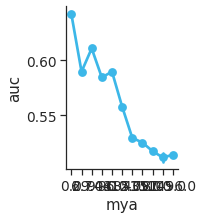

In [40]:
sc_bar = sns.pointplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.mean, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()



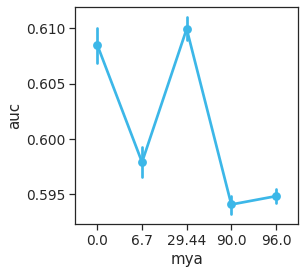

In [696]:
sc_bar = sns.pointplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.mean, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()



In [389]:
!pip install colorcet

     |████████████████████████████████| 1.6 MB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 475 kB/s s eta 0:00:01


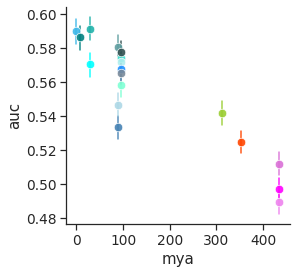

In [162]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc


my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")

df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.mean, linewidth=1, ci=68, err_style='bars', marker='.', markersize=17, palette=colorsm[0:df_species_auc['species_1'].nunique()], color='grey', alpha=0.9)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


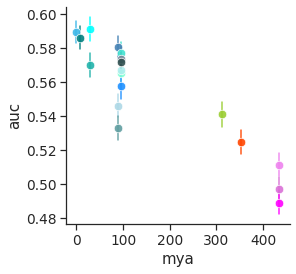

In [161]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc


my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")

df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.mean, linewidth=1, ci=68, err_style='bars', marker='.', markersize=17, palette=colorsm[0:df_species_auc['species_1'].nunique()], color='grey', alpha=0.9)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


In [136]:
len(colorsm[0:df_species_auc['species_1'].nunique()])

21

In [138]:
df_species_auc['species_1'].nunique()

22

In [89]:
df_species_auc['species_1'].nunique()

18

In [146]:
colorsm = ['#3CB7E8', 'teal', 'aqua', 'lightseagreen', 'steelblue', 'lightblue', 'cadetblue', 'turquoise', 'aquamarine', 'paleturquoise', 'dodgerblue', 'lightslategrey', 'darkslategrey', 'yellowgreen', 'orangered', 'violet', 'orchid', 'magenta', 'orange', 'darkorange', 'goldenrod', 'tan']


In [ ]:
for c in colorsm[0:]

In [70]:
['o']*18

['o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o']

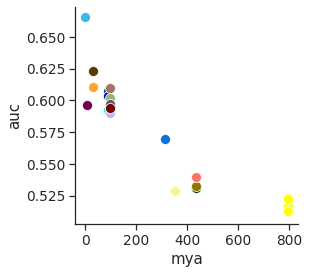

In [763]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc


my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")
mp = my_color_list[0:18] + 4*['yellow']
df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, color='black', palette=mp)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


In [761]:
mp = my_color_list[0:18] + 4*['yellow']

['#3CB7E8',
 '#6b004f',
 '#ffa52f',
 '#573b00',
 '#005659',
 '#0000dd',
 '#00fdcf',
 '#a17569',
 '#bcb6ff',
 '#95b577',
 '#bf03b8',
 '#645474',
 '#790000',
 '#0774d8',
 '#fdf490',
 '#004b00',
 '#8e7900',
 '#ff7266',
 'yellow',
 'yellow',
 'yellow',
 'yellow']

In [717]:
df_species_auc

auc    mya     species_1 species_2  gene_id_jac_sim  \
1288  0.492063    0.0         human     human  ENSG00000000460   
1715  0.815159    0.0         human     human  ENSG00000258366   
1502  0.719900    0.0         human     human  ENSG00000134058   
1714  0.744709    0.0         human     human  ENSG00000244038   
1713  0.920885    0.0         human     human  ENSG00000204316   
...        ...    ...           ...       ...              ...   
8300  0.604348  435.0  rainbowtrout     human  ENSG00000100304   
8301  0.481159  435.0  rainbowtrout     human  ENSG00000100109   
8285  0.355501  435.0  rainbowtrout     human  ENSG00000258366   
8222  0.547805  435.0  rainbowtrout     human  ENSG00000140521   
8303  0.570048  435.0  rainbowtrout     human  ENSG00000184708   

                  Species    Common_name  Tax_ID superkingdom  kingdom  \
1288         Homo sapiens          Human    9606    Eukaryota  Metazoa   
1715         Homo sapiens          Human    9606    Eukaryota  Metazoa   
1502         Homo sapiens          Human    9606    Eukaryota  Metazoa   
1714         Homo sapiens          Human    9606    Eukaryota  Metazoa   
1713         Homo sapiens          Human    9606    Eukaryota  Metazoa   
...                   ...            ...     ...          ...      ...   
8300  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8301  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8285  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8222  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8303  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

        phylum        class          order      family         genus species  \
1288  Chordata     Mammalia       Primates   Hominidae          Homo     NaN   
1715  Chordata     Mammalia       Primates   Hominidae          Homo     NaN   
1502  Chordata     Mammalia       Primates   Hominidae          Homo     NaN   
1714  Chordata     Mammalia       Primates   Hominidae          Homo     NaN   
1713  Chordata     Mammalia       Primates   Hominidae          Homo     NaN   
...        ...          ...            ...         ...           ...     ...   
8300  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8301  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8285  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8222  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8303  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   

        saved_name  count  
1288         human      1  
1715         human      1  
1502         human      1  
1714         human      1  
1713         human      1  
...            ...    ...  
8300  rainbowtrout      1  
8301  rainbowtrout      1  
8285  rainbowtrout      1  
8222  rainbowtrout      1  
8303  rainbowtrout      1  

[7722 rows x 18 columns]

In [145]:
rcParams['figure.figsize'] = 5,4
import seaborn as sns
import colorcet as cc


#my_color_list = cc.glasbey[1:df_species_auc['species_1'].nunique()+5]
my_color_list = cc.glasbey[1:df_species_auc['species_1'].nunique()+5]
#my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'
#my_color_list = ['green']*13 + ['#790000']*5
palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")

df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=10, ci=68, err_style='bars', marker='o', markersize=5, color='black', palette=palette, alpha=0.5)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


ValueError: The palette list has the wrong number of colors.

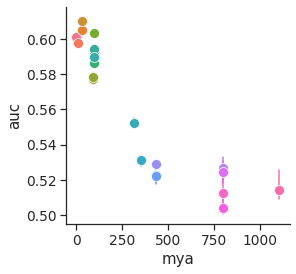

In [701]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc


my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")

df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, color='black')
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


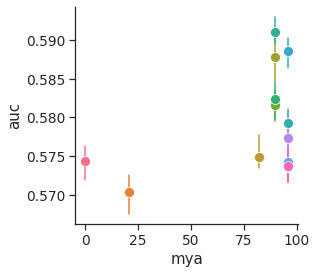

In [650]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc


my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")

df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, color='black')
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


In [ ]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc


my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")

df_species_auc.sort_values(['mya'], inplace=True)
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_1', estimator=np.median, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10, color='black')
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()


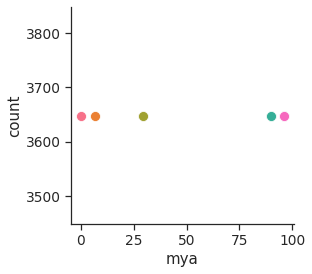

In [605]:
rcParams['figure.figsize'] = 4,4
import seaborn as sns
import colorcet as cc



my_color_list = cc.glasbey[5:df_species_auc['species_1'].nunique()+5]
my_color_list[0] = '#3CB7E8'
#my_color_list[4] = '#E83B43'
#my_color_list[-1] = '#E8A63B'

palette = sns.color_palette(my_color_list)


sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_style("ticks")


sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='count', hue='species_1', estimator=np.sum, linewidth=50, ci=68, err_style='bars', marker='o', markersize=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_1', color='black', estimator=np.median, marker='o', size=10)
#sns.scatterplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median)
#sns.lineplot(data=df_species_auc, x='species_1', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
sns.despine()

In [218]:
df_species_auc.groupby(['mya', 'Common_name'])['auc'].mean()

mya     Common_name        
0.00    Human                  0.589635
6.70    Chimpanzee             0.586244
29.44   Crab-eating macaque    0.570483
        Rhesus macaque         0.591212
90.00   European rabbit        0.580571
        Mouse                  0.546115
        Rat                    0.533251
96.00   Boar                   0.565312
        Cow                    0.577497
        Dog                    0.567436
        Goat                   0.571712
        Horse                  0.557890
        Sheep                  0.573959
312.00  Chicken                0.541501
351.80  Western clawed frog    0.524697
435.00  Atlantic salmon        0.489169
        Rainbow trout          0.497099
        Zebrafish              0.511558
Name: auc, dtype: float64

In [337]:
df_species_auc

auc    mya     species_1 species_2  gene_id_jac_sim  \
0     0.565743   96.0          boar     human  ENSG00000112365   
1     0.854408   96.0          boar     human  ENSG00000120438   
2     0.323426   96.0          boar     human  ENSG00000130024   
3     0.596088   96.0          boar     human  ENSG00000070269   
4     0.672953   96.0          boar     human  ENSG00000198887   
...        ...    ...           ...       ...              ...   
8299  0.475362  435.0  rainbowtrout     human  ENSG00000099910   
8300  0.604348  435.0  rainbowtrout     human  ENSG00000100304   
8301  0.481159  435.0  rainbowtrout     human  ENSG00000100109   
8302  0.454106  435.0  rainbowtrout     human  ENSG00000099949   
8303  0.570048  435.0  rainbowtrout     human  ENSG00000184708   

                  Species    Common_name  Tax_ID superkingdom  kingdom  \
0              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
2              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
3              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
4              Sus scrofa           Boar    9823    Eukaryota  Metazoa   
...                   ...            ...     ...          ...      ...   
8299  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8300  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8301  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8302  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
8303  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

        phylum        class          order      family         genus species  \
0     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
1     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
2     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
3     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
4     Chordata     Mammalia   Artiodactyla      Suidae           Sus     NaN   
...        ...          ...            ...         ...           ...     ...   
8299  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8300  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8301  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8302  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   
8303  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus     NaN   

        saved_name  count  
0             boar      1  
1             boar      1  
2             boar      1  
3             boar      1  
4             boar      1  
...            ...    ...  
8299  rainbowtrout      1  
8300  rainbowtrout      1  
8301  rainbowtrout      1  
8302  rainbowtrout      1  
8303  rainbowtrout      1  

[7722 rows x 18 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

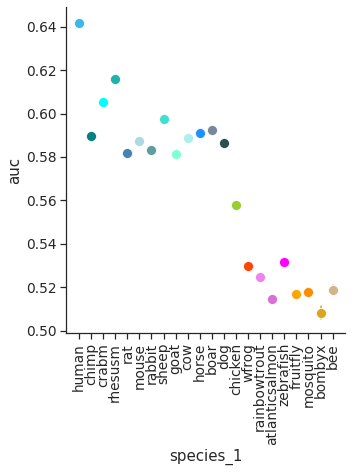

In [151]:
from matplotlib import rcParams
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 5,6
#sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style("ticks")
#sns.despine()
#sns.set_style("whitegrid")
#sns.axes_style("whitegrid")

#sns.axes_style("whitegrid")
sc_bar = sns.lineplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='species_1', estimator=np.mean, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10, linestyle='', palette=colorsm)
#sc_bar = sns.scatterplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.mean, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10)
#sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.median, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10)
#sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.median, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10)
#sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].mean().reset_index(), x='species_1', y='auc', hue='mya', estimator=np.mean, order=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya'])['species_1'].tolist())
sc_bar.legend().remove()
sns.despine()
plt.xticks(rotation=90)
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

In [143]:
len(colorsm)

22

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

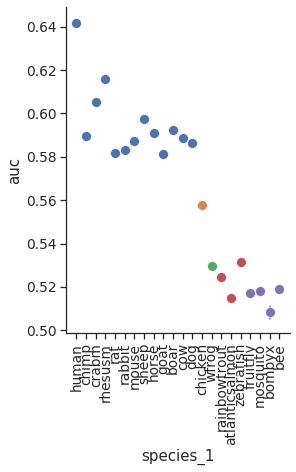

In [45]:
from matplotlib import rcParams
fig, ax = plt.subplots()
rcParams['figure.figsize'] = 5,6
#sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style("ticks")
#sns.despine()
#sns.set_style("whitegrid")
#sns.axes_style("whitegrid")

#sns.axes_style("whitegrid")
sc_bar = sns.lineplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.mean, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10, linestyle='')
#sc_bar = sns.scatterplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.mean, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10)
#sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.median, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10)
#sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), y='auc', x='species_1', hue='class', estimator=np.median, linewidth=0, ci=68, err_style='bars', marker='o', markersize=10)
#sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].mean().reset_index(), x='species_1', y='auc', hue='mya', estimator=np.mean, order=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya'])['species_1'].tolist())
sc_bar.legend().remove()
sns.despine()
plt.xticks(rotation=90)
#ax.xaxis.grid(True)
#ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

In [513]:
df_species_auc

auc    mya     species_1 species_2  gene_id_jac_sim  \
1012    0.462917   96.0          boar     human  ENSG00000152234   
1013    0.608428   96.0          boar     human  ENSG00000154548   
1014    0.643381   96.0          boar     human  ENSG00000069667   
1015    0.573511   96.0          boar     human  ENSG00000106733   
1016    0.572407   96.0          boar     human  ENSG00000134440   
...          ...    ...           ...       ...              ...   
185804  0.470224  435.0  rainbowtrout     human  ENSG00000185507   
185805  0.496299  435.0  rainbowtrout     human  ENSG00000174231   
185806  0.490814  435.0  rainbowtrout     human  ENSG00000278259   
185807  0.511409  435.0  rainbowtrout     human  ENSG00000160439   
185808  0.490471  435.0  rainbowtrout     human  ENSG00000204438   

                    Species    Common_name  Tax_ID superkingdom  kingdom  \
1012             Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1013             Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1014             Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1015             Sus scrofa           Boar    9823    Eukaryota  Metazoa   
1016             Sus scrofa           Boar    9823    Eukaryota  Metazoa   
...                     ...            ...     ...          ...      ...   
185804  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
185805  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
185806  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
185807  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   
185808  Oncorhynchus mykiss  Rainbow trout    8022    Eukaryota  Metazoa   

          phylum        class          order      family         genus  \
1012    Chordata     Mammalia   Artiodactyla      Suidae           Sus   
1013    Chordata     Mammalia   Artiodactyla      Suidae           Sus   
1014    Chordata     Mammalia   Artiodactyla      Suidae           Sus   
1015    Chordata     Mammalia   Artiodactyla      Suidae           Sus   
1016    Chordata     Mammalia   Artiodactyla      Suidae           Sus   
...          ...          ...            ...         ...           ...   
185804  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus   
185805  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus   
185806  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus   
185807  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus   
185808  Chordata  Actinopteri  Salmoniformes  Salmonidae  Oncorhynchus   

       species    saved_name  count  
1012       NaN          boar      1  
1013       NaN          boar      1  
1014       NaN          boar      1  
1015       NaN          boar      1  
1016       NaN          boar      1  
...        ...           ...    ...  
185804     NaN  rainbowtrout      1  
185805     NaN  rainbowtrout      1  
185806     NaN  rainbowtrout      1  
185807     NaN  rainbowtrout      1  
185808     NaN  rainbowtrout      1  

[175639 rows x 18 columns]

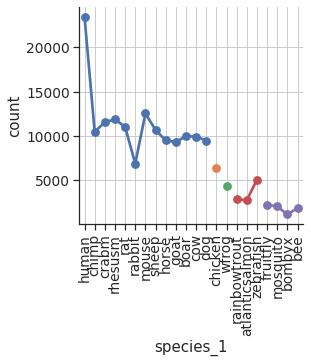

In [512]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='count', hue='class', estimator=np.sum, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")

In [460]:
df_species_auc['species_1'].nunique()

37

In [509]:
df_species_auc.groupby(['species_1'])['auc'].count()

species_1
atlanticsalmon     2765
bee                1890
boar               9988
bombyx             1154
chicken            6343
chimp             10480
cow                9947
crabm             11558
dog                9490
fruitfly           2258
goat               9342
horse              9514
human             23465
mosquito           2061
mouse             12553
rabbit             6894
rainbowtrout       2855
rat               11039
rhesusm           11898
roundworm          1761
sheep             10691
wfrog              4360
zebrafish          5094
Name: auc, dtype: int64

In [ ]:
sc_bar = sns.lineplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8', '#E83B43', '#E8A63B'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()

plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/all_species_hic_coexp.pdf',
            transparent=True)


In [1]:
auc_list = []
#for species_2, col_num in zip(['human', 'mouse', 'drosophila'], [5, 7, 4]):
for species_2, col_num in zip(['human'], [5]):
    ['mammlia', 'chordata', 'metazoa', 'insect', 'chrodata_artho']
    mya = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/spe39_divergence_timetree.csv")
    mya_ben = pd.read_csv("/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/software/CoCoCoNet/species_classification_ranks_processed.txt")
    

    mya_2 = mya.fillna(0).to_numpy()[:-1,1::] + mya.fillna(0).to_numpy()[:-1,1::].T

    mya_l = mya_2[:,col_num].tolist()

    species_name = mya.fillna(0).to_numpy()[:-1,0].tolist()

    mya = pd.DataFrame(list(zip(species_name , mya_l)), columns=['species','mya'])

    mya['species'] = [x if x!= "fly" else "drosophila" for x in mya['species']]

    import numpy as np

    for species, mya_dist in zip(mya['species'].tolist(), mya['mya'].tolist()):
        try:
            if species_2 == 'drosophila':
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_with_coexp.csv"
            else:
                file_path_1 = f"/grid/gillis/data/lohia/hi_c_data_processing/data_{species_2}/aggregates/10kbp_raw/max/inter_only/hic_gene_KR_inter_10_percent_per_chr_{species}_aggregates_with_coexp.csv"

            auc_values_1 = pd.read_csv(file_path_1, sep='\t')
            #print (auc_values_1)
            #gene_l = ortho_file['human'].tolist()
            #auc_values_1 = auc_values_1[auc_values_1['gene_id_jac_sim'].isin(gene_l)]
            #print (auc_values_1)
            auc_values_1['mya'] = mya_dist
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])


        except:
            auc_values_1['mya'] = np.nan
            true_species = ["fruitfly" if x=='drosophila' else x for x in [species]]
            true_species_2 = ["fruitfly" if x=='drosophila' else x for x in [species_2]]
            auc_values_1['species_1'] = true_species[0]
            auc_values_1['species_2'] = true_species_2[0]
            print (species)
            auc_list.append(auc_values_1[['auc', 'mya', 'species_1', 'species_2', 'gene_id_jac_sim']])
            

NameError: name 'pd' is not defined

In [292]:
df_species_auc = pd.concat(auc_list)

df_species_auc.dropna(inplace=True)

df_species_auc = df_species_auc.merge(mya_ben, left_on='species_1', right_on='saved_name')

df_species_auc['count'] = 1

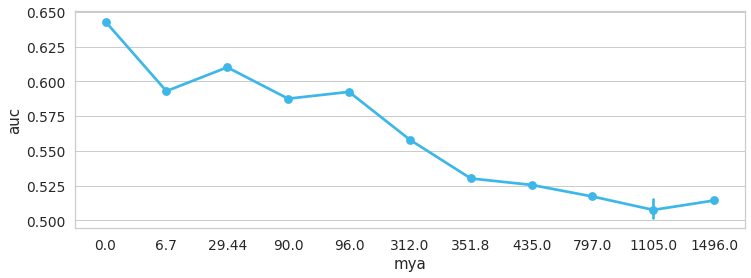

In [293]:
sc_bar = sns.pointplot(data=df_species_auc, x='mya', y='auc', hue='species_2', palette=['#3CB7E8'], estimator=np.median, linewidth=3, ci=68, err_style='bars')
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()

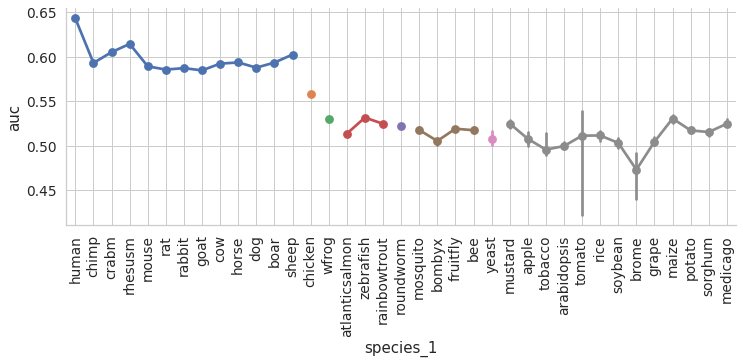

In [294]:
from matplotlib import rcParams
fig, ax = plt.subplots()
sns.set_style("ticks")
sns.despine()
sns.set_style("whitegrid")
#sns.axes_style("whitegrid")
rcParams['figure.figsize'] = 12,4
sns.axes_style("whitegrid")
sc_bar = sns.pointplot(data=df_species_auc[df_species_auc['species_2']=='human'].sort_values(by=['mya']), x='species_1', y='auc', hue='class', estimator=np.median, linewidth=3, ci=68, err_style='bars', sort= False, ax=ax, join=True)
#sns.scatterplot(data=df_species_auc.groupby(['species_2', 'species_1', 'mya'])['auc'].median().reset_index(), x='mya', y='auc', hue='species_2', palette=['#E8A63B', '#3CB7E8', '#E8A63B'], estimator=np.median)
sc_bar.legend().remove()
#sns.despine()
plt.xticks(rotation=90)
ax.xaxis.grid(True)
ax.yaxis.grid(True)


#plt.savefig('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/human_species_hic_coexp.pdf',
#            transparent=True, bbox_inches="tight")